In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from velotest.hypothesis_testing import run_hypothesis_test_on, run_hypothesis_test
from velotest.plotting import arrow_plot, marker_plot
import scvelo
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
adata = scvelo.read("data/human_cell_cycle_scvelo_log.h5ad")
adata

AnnData object with n_obs × n_vars = 1067 × 2000
    obs: 'cell_cycle_phase', 'cell_cycle_hrs', 'clusters', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'log1p', 'neighbors', 'pca', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'xv_pca'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced', 'variance_velocity', 'velocity', 'xv'
    obsp: 'connectivities', 'distances'

In [4]:
embedding = np.load("embeddings/embedding_scvelo_human_cell_cycle_scvelo_log_PCA30_on_x_exaggeration_2.npy")

assert len(embedding) % 2 == 0
number_cells = int(len(embedding)/2)
embedding_position = embedding[:number_cells]
embedding_velocity = embedding[number_cells:]

In [5]:
# Run test
uncorrected_p_values, h0_rejected, debug_dict = run_hypothesis_test(adata.layers['Ms'], adata.layers['velocity'], embedding_position, embedding_velocity, number_neighbors_to_sample_from=300, number_neighborhoods=500, null_distribution="velocities", cosine_empty_neighborhood=None, exclusion_degree=5, correction="bonferroni")

100%|██████████| 1018/1018 [03:00<00:00,  5.63it/s]


<Axes: >

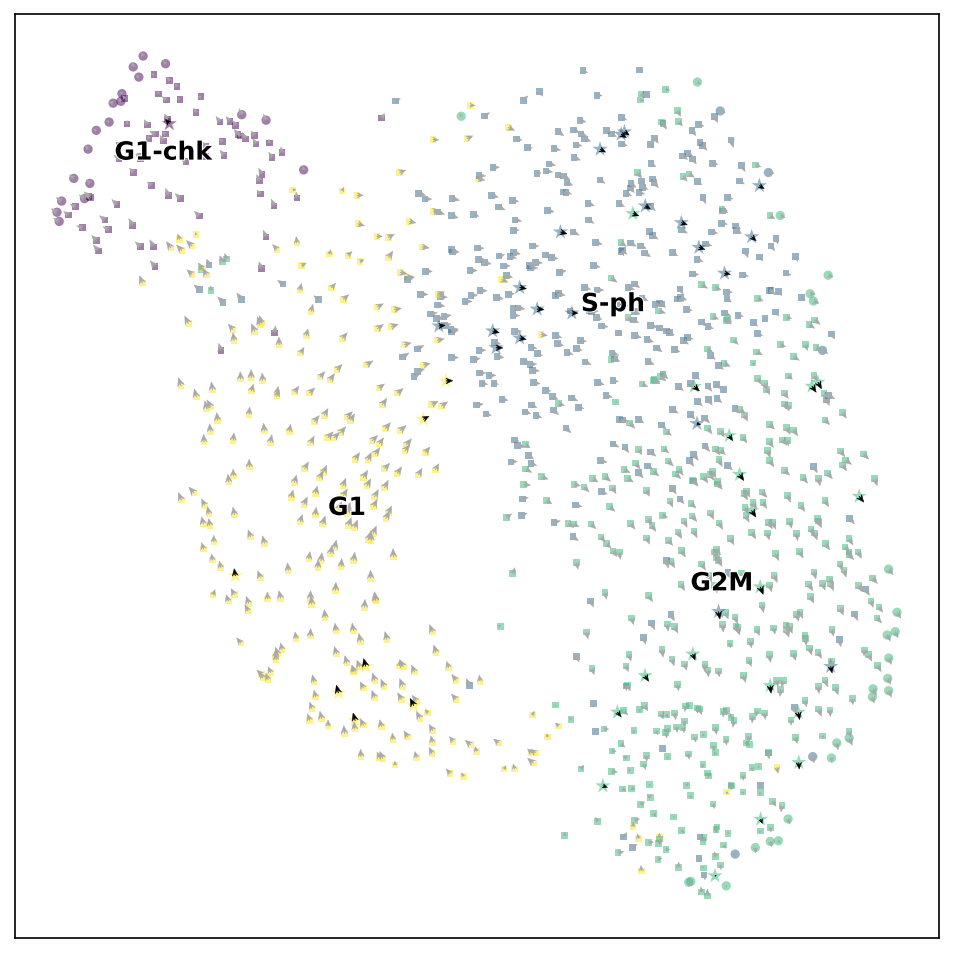

In [6]:
# Plotting
color_dict = None
labels = adata.obs["cell_cycle_phase"]

arrow_plot(embedding_position, embedding_velocity, uncorrected_p_values, h0_rejected, labels=labels, label_colormap=color_dict)

<Axes: >

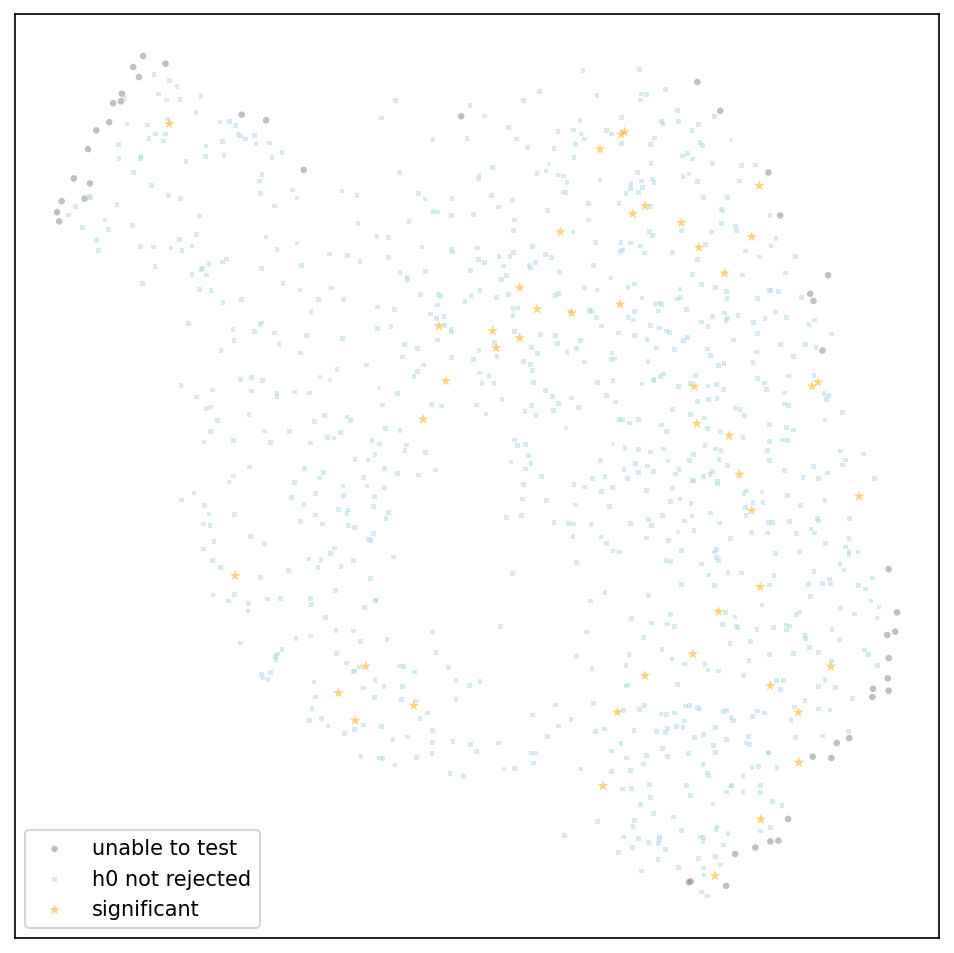

In [7]:
marker_plot(embedding_position, uncorrected_p_values, h0_rejected, multiplier_marker_size=0.5)

In [8]:
import numpy as np
np.sum(h0_rejected)

47